# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import os
from IPython.display import Image


%pylab inline


if os.getenv('PUIDATA') is None:
    print('must set up env var PUIDATA')
else:
    print ('env var PUIDATA exist')

os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")


Populating the interactive namespace from numpy and matplotlib
must set up env var PUIDATA


In [2]:
def GetCitibikeCSV(DateString):
    print ("Downloading", DateString)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + DateString + "-citibike-tripdata.csv"):
        if os.path.isfile(DateString + "-citibike-tripdata.csv"):
            if os.system ("mv " + DateString + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print('Error moving files! please check.')
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + DateString + "-citibike-tripdata.zip"):
                if not os.path.isfile(DateString + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + DateString + "-citibike-tripdata.zip")
                os.system("mv " + DateString + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            os.system("unzip " + os.getenv("PUIDATA") + "/" + DateString + "-citibike-tripdata.zip")                  
            if '2014' in DateString:
                os.system("mv " + DateString[:4] + "-" +  DateString[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + DateString + "-citibike-tripdata.csv")
            os.system("mv " + DateString + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + DateString + "-citibike-tripdata.csv"):
        print('Warning! the file is still not there!')
    
    else:
        print('file is there, please continue.')

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [3]:
DateString1 = '201501'
DateString7 = '201507'
GetCitibikeCSV(DateString1)
GetCitibikeCSV(DateString7)

file is there, please continue.
file is there, please continue.


In [4]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + DateString1 + '-citibike-tripdata.csv')
df7 = pd.read_csv(os.getenv("PUIDATA") + "/" + DateString7 + '-citibike-tripdata.csv')
df = pd.merge(df1, df7, how='outer')
df.head(5) 
df.tail(5)#confirm that the dataframe is merged 

tripduration           starttime           stoptime  \
1371223           275  7/31/2015 23:59:40  8/1/2015 00:04:15   
1371224           530  7/31/2015 23:59:41  8/1/2015 00:08:32   
1371225           273  7/31/2015 23:59:42  8/1/2015 00:04:15   
1371226          1273  7/31/2015 23:59:56  8/1/2015 00:21:09   
1371227          1667  7/31/2015 23:59:59  8/1/2015 00:27:46   

         start station id          start station name  start station latitude  \
1371223               383  Greenwich Ave & Charles St               40.735238   
1371224               455             1 Ave & E 44 St               40.750020   
1371225               383  Greenwich Ave & Charles St               40.735238   
1371226               477             W 41 St & 8 Ave               40.756405   
1371227              2021             W 45 St & 8 Ave               40.759291   

         start station longitude  end station id         end station name  \
1371223               -74.000271             404          9 Ave & W 14 St   
1371224               -73.969053             507          E 25 St & 2 Ave   
1371225               -74.000271             404          9 Ave & W 14 St   
1371226               -73.990026             432        E 7 St & Avenue A   
1371227               -73.988597             401  Allen St & Rivington St   

         end station latitude  end station longitude  bikeid    usertype  \
1371223             40.740583             -74.005509   22667  Subscriber   
1371224             40.739126             -73.979738   20640  Subscriber   
1371225             40.740583             -74.005509   22134    Customer   
1371226             40.726218             -73.983799   22861  Subscriber   
1371227             40.720196             -73.989978   16458  Subscriber   

         birth year  gender  
1371223      1987.0       1  
1371224      1960.0       1  
1371225         NaN       0  
1371226      1986.0       1  
1371227      1988.0       1

In [5]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

tripduration      starttime       stoptime  start station id  \
0          1346  1/1/2015 0:01  1/1/2015 0:24               455   
1           363  1/1/2015 0:02  1/1/2015 0:08               434   
2           346  1/1/2015 0:04  1/1/2015 0:10               491   
3           182  1/1/2015 0:04  1/1/2015 0:07               384   
4           969  1/1/2015 0:05  1/1/2015 0:21               474   

        start station name  start station latitude  start station longitude  \
0          1 Ave & E 44 St               40.750020               -73.969053   
1          9 Ave & W 18 St               40.743174               -74.003664   
2     E 24 St & Park Ave S               40.740964               -73.986022   
3  Fulton St & Waverly Ave               40.683178               -73.965964   
4          5 Ave & E 29 St               40.745168               -73.986831   

   end station id             end station name  end station latitude  \
0             265     Stanton St & Chrystie St             40.722293   
1             482              W 15 St & 7 Ave             40.739355   
2             505              6 Ave & W 33 St             40.749013   
3             399  Lafayette Ave & St James Pl             40.688515   
4             432            E 7 St & Avenue A             40.726218   

   end station longitude  bikeid    usertype  birth year  gender  \
0             -73.991475   18660  Subscriber      1960.0       2   
1             -73.999318   16085  Subscriber      1963.0       1   
2             -73.988484   20845  Subscriber      1974.0       1   
3             -73.964763   19610  Subscriber      1969.0       1   
4             -73.983799   20197  Subscriber      1977.0       1   

                 date  
0 2015-01-01 00:01:00  
1 2015-01-01 00:02:00  
2 2015-01-01 00:04:00  
3 2015-01-01 00:04:00  
4 2015-01-01 00:05:00

In [6]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

**H0: there is no statistical difference in the trip duration distribution that ride during the day (between 6:00-18:00) and night (between 00:00-6:00 and 18:00 to 24:00)**

$$ \alpha = 0.05 $$

extracting the ride during the day versus night in the cell below

In [7]:
#df is the dataframe where the content of the csv file is stored
#df_test = df[0:50000]
df_1 = df #copay the original DataFrame to another one in order to .drop() but keep the original data
df_1.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'], axis=1, inplace=True) #dropping some data I no longer need

In [8]:
df_1 = df_1.set_index('date')
df_1.head()

tripduration
date                             
2015-01-01 00:01:00          1346
2015-01-01 00:02:00           363
2015-01-01 00:04:00           346
2015-01-01 00:04:00           182
2015-01-01 00:05:00           969

In [9]:
df_1.describe()

tripduration
count  1.371228e+06
mean   9.024175e+02
std    7.164578e+03
min    6.000000e+01
25%    3.910000e+02
50%    6.240000e+02
75%    1.031000e+03
max    5.174309e+06

In [10]:
df_1_day = df_1.between_time('06:00:00', '18:00:00') #filter out ride during the day 
df_1_night = df_1.between_time('18:00:00', '06:00:00')#filter out ride during the night
df_1_night.head(10) #verify that the data is filtered successfully

tripduration
date                             
2015-01-01 00:01:00          1346
2015-01-01 00:02:00           363
2015-01-01 00:04:00           346
2015-01-01 00:04:00           182
2015-01-01 00:05:00           969
2015-01-01 00:07:00           496
2015-01-01 00:07:00           152
2015-01-01 00:08:00          1183
2015-01-01 00:09:00           846
2015-01-01 00:10:00           576

In [11]:
# dropping NaN values
df_1_day.dropna(inplace= True)
df_1_night.dropna(inplace= True)

/Users/A123/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/A123/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

Text(0.5,1,'ride during the night')

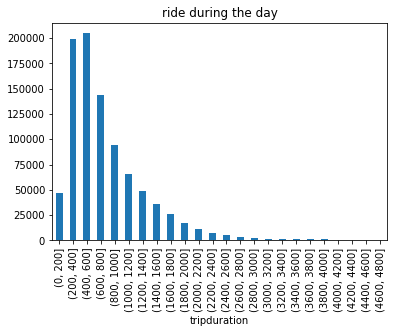

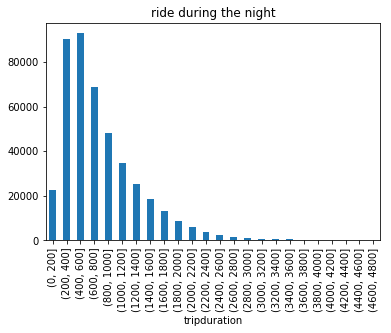

In [12]:

bins = np.arange(0, 5000, 200)
axD = df_1_day.tripduration.groupby(pd.cut(df_1_day.tripduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("ride during the day")

axN = df_1_night.tripduration.groupby(pd.cut(df_1_night.tripduration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("ride during the night")



**Figure 1:** histogrammed distribution of tripduration by day Versus night. Throught the histogram, although the number of people riding in day time is more than that of people riding in the night time, the shape of the distribution is similar. The majority length of tripduration is between 200 and 800 seconds.

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

              count_nonzero
tripduration               
(0, 200]           0.000577
(200, 400]         0.010841
(400, 600]         0.022922
(600, 800]         0.022793
(800, 1000]        0.016196
(1000, 1200]       0.009281
(1200, 1400]       0.004414
(1400, 1600]       0.001955
(1600, 1800]       0.000529
(1800, 2000]       0.000548
(2000, 2200]       0.001988
(2200, 2400]       0.002248
(2400, 2600]       0.002590
(2600, 2800]       0.002495
(2800, 3000]       0.002314
(3000, 3200]       0.002046
(3200, 3400]       0.001630
(3400, 3600]       0.001416
(3600, 3800]       0.001157
(3800, 4000]       0.000879
(4000, 4200]       0.000610
(4200, 4400]       0.000400
(4400, 4600]       0.000206
(4600, 4800]       0.000000


/Users/A123/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


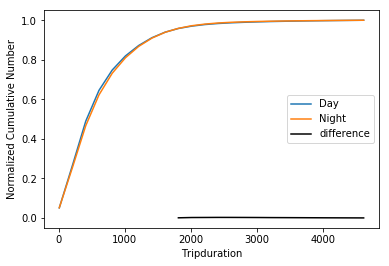

In [13]:
#print (df_1_day.tripduration.cumsum())

csD=df_1_day.tripduration.groupby(pd.cut(df_1_day.tripduration, bins)).agg([count_nonzero]).cumsum()

csN=df_1_night.tripduration.groupby(pd.cut(df_1_night.tripduration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 10, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 10, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 10, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Tripduration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2:** the cumulative distribution of tripduration by day Versus night. The shape of these two distributions are almost same. For both day and night sample, the normalized cumulative number is increased sharply when duration is less than 2000 seconds, while keep roughly same after 2000 seconds. 

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

**Answer: If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.**

In [14]:
ks = scipy.stats.ks_2samp(df_1_day.tripduration, df_1_night.tripduration)
print (ks)

Ks_2sampResult(statistic=0.02276611267578388, pvalue=1.2668552241748146e-135)


**Summary:**
KS-test tests whether 2 samples are drawn from the same distribution. It returns two floats: the first is KS statistic, the second is two-tailed p-value. In terms of the Null hypothesis, if the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same. Applying to the Citibike case, since the p-value is just 1.2668552241748146e-135 which is far smaller than critical value 0.05, we reject the Null hypothesis that there is no statistical difference in the trip duration distribution for the day time versus the night time.

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

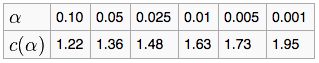

In [15]:
#here is the critical values tablel. you should first chose your significance level!
Image(filename="../HW5_rs6431/ks2sample_table.png")

# redo the KS tests with reducted dataset

In [16]:
df_1_daySub = df_1_day.sample(n = int(len(df_1_day)/200), random_state=1997) #daytime subset 200 times smaller
df_1_nightSub = df_1_night.sample(n = int(len(df_1_night)/200), random_state=1997) #nighttime subset 200 times smaller
print(df_1_day.shape, df_1_daySub.shape) #verify the subset size
print(df_1_night.shape, df_1_nightSub.shape)

ks = scipy.stats.ks_2samp(df_1_daySub.tripduration, df_1_nightSub.tripduration)
print (ks)

(928121, 1) (4640, 1)
(443688, 1) (2218, 1)
Ks_2sampResult(statistic=0.034792333882652904, pvalue=0.05166043873976148)


**Summary:**
KS-test tests whether 2 samples are drawn from the same distribution. It returns two floats: the first is KS statistic, the second is two-tailed p-value. In terms of the Null hypothesis, if the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same. After reducting the size, the p-value increase to 0.0167 which is smaller than critical value 0.05. Therefore, we can reject the Null hypothesis that there is no statistical difference in the trip duration distribution for the day time versus the night time.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr

Pearson's  test assume that both datasets are normally distributedThe Pearson correlation coefficient is very sensitive to extreme data values. A single value that is very different from the other values in a data set can greatly change the value of the coefficient. You should try to identify the cause of any extreme value. Correct any data entry or measurement errors. 



In [17]:
print (df_1_day.shape)
print (df_1_night.shape)
#sortD = df_1_day.sort_values(['tripduration'], inplace=True)
#sortN = df_1_night.sort_values(['tripduration'], inplace=True)

(928121, 1)
(443688, 1)


In [18]:
np.random.seed(7)
df_1_dayCorr = np.random.choice(df_1_day.tripduration, size=40000, replace=True)
df_1_nightCorr = np.random.choice(df_1_night.tripduration, size=40000, replace=True)

In [19]:
df_1_dayCorr.sort()
df_1_nightCorr.sort()

In [20]:
scipy.stats.pearsonr(df_1_dayCorr, df_1_nightCorr)

(0.916801140720418, 0.0)

**Summary:** Pearson's test returns two floats: the first is Pearsonâ€™s correlation coefficient, and the second is 2-tailed p-value. The Pearson correlation coefficient measures the linear relationship between two datasets, and the correlations of -1 or +1 imply an exact linear relationship. In this case, the coefficient is 0.53, indicating that there is positive correlations between the two samples. 
The p-value indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. In this case, the p-value is 0.0 which is far smaller than 0.05. It means that the correlation between the two variables (tripduration of day and tripduration of night) are statistically significant. Therefore, we have enough evidence to reject the null hypothesis for non-correlation.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [21]:
scipy.stats.spearmanr(df_1_dayCorr, df_1_nightCorr)

SpearmanrResult(correlation=0.99999931250152, pvalue=0.0)

**Summary:** The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. It returns correlation coefficient and the p-value to test for non-correlation. In this case, the coefficient is 0.99 which is nearly 1, indicating that there is highly positive correlations between the two samples. The two-sided p-value test the hypothesis whose null hypothesis is that two sets of data are uncorrelated. In this case, the p-value is 0.0 which is far smaller than 0.05. It means that the correlation between the two variables (tripduration of day and tripduration of night) are statistically significant. Therefore, we have enough evidence to reject the null hypothesis for non-correlation.

# Extra credit: test the age of bikers for trips originating in Manhattan and in Brooklyn

**$H_0$: there is no statistical difference in the age distribution of bikers for trips originating in Manhattan and in Brooklyn**

$$ \alpha = 0.05 $$